In [409]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset

mouse_df = pd.DataFrame(mouse_data)
clinical_df = pd.DataFrame(clinical_data)
combined_df = pd.merge(mouse_df, clinical_df, on= 'Mouse ID' )
# Display the data table for preview


mouse_df.head()
clinical_df.head()
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [410]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_group = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_group)
# Preview DataFrame
tumor_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [411]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
tumor_sem_df = pd.DataFrame(tumor_sem)
# Preview DataFrame
tumor_sem_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [412]:
# Minor Data Munging to Re-Format the Data Frames
tumor_sem_df = tumor_sem_df.reset_index()
# Preview that Reformatting worked
tumor_mean_df = tumor_mean_df.reset_index()
tumor_mean_df1 = tumor_mean_df.pivot(index = 'Timepoint', columns = 'Drug')["Tumor Volume (mm3)"]

tumor_sem_df1 = tumor_sem_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_mean_df1


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


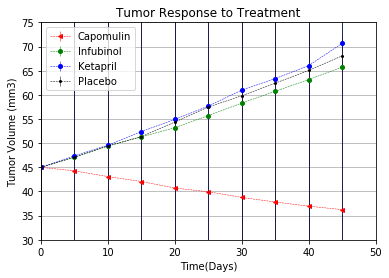

In [413]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_mean_df1.index, tumor_mean_df1['Capomulin'], yerr = tumor_mean_df1['Capomulin'],color='r', marker='<',markersize= 4,linestyle = '--', linewidth = 0.5)
plt.errorbar(tumor_mean_df1.index, tumor_mean_df1['Infubinol'], yerr = tumor_mean_df1['Infubinol'],color='g', marker='o',markersize= 4,linestyle = '--', linewidth = 0.5)
plt.errorbar(tumor_mean_df1.index, tumor_mean_df1['Ketapril'], yerr = tumor_mean_df1['Ketapril'],color='b', marker='o',markersize= 4,linestyle = '--', linewidth = 0.5)
plt.errorbar(tumor_mean_df1.index, tumor_mean_df1['Placebo'], yerr = tumor_mean_df1['Placebo'],color='k', marker='.',markersize= 4,linestyle = '--', linewidth = 0.5)
plt.xlabel('Time(Days)')
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
#plt.yticks[0,5,10,15,20,25,30,35,40,45]
plt.xlim(0,50)
plt.ylim(30,75)
plt.legend(loc = ('best'))
plt.grid(True)

# Save the figure
#plt.savefig("tumor_response_to_treatment.png")


In [414]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [415]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metasite_group = combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
#metasite_group.reset_index()


metasite_df = pd.DataFrame(metasite_group)
metasite_df1= metasite_df.unstack(level=0)
metasite_df1.columns = metasite_df1.columns.get_level_values(1)

# Preview DataFrame
metasite_df1.head()

#list(metasite_df1.columns.values)




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [416]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metasite_sem = combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
metasite_sem.reset_index()
metasite_sem_df = pd.DataFrame(metasite_sem)
# Preview DataFrame
metasite_sem_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [417]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


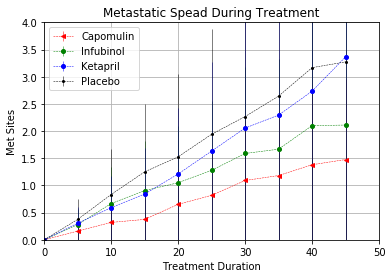

In [418]:
plt.errorbar(metasite_df1.index, metasite_df1['Capomulin'], yerr = metasite_df1['Capomulin'],color='r', marker='<',markersize= 4,linestyle = '--', linewidth = 0.5)
plt.errorbar(metasite_df1.index, metasite_df1['Infubinol'], yerr = metasite_df1['Infubinol'],color='g', marker='o',markersize= 4,linestyle = '--', linewidth = 0.5)
plt.errorbar(metasite_df1.index, metasite_df1['Ketapril'], yerr = metasite_df1['Ketapril'],color='b', marker='o',markersize= 4,linestyle = '--', linewidth = 0.5)
plt.errorbar(metasite_df1.index, metasite_df1['Placebo'], yerr = metasite_df1['Placebo'],color='k', marker='.',markersize= 4,linestyle = '--', linewidth = 0.5)
plt.xlabel('Treatment Duration')
plt.ylabel("Met Sites")
plt.title("Metastatic Spead During Treatment")
#plt.yticks[0,5,10,15,20,25,30,35,40,45]
plt.xlim(0,50)
plt.ylim(0,4)
plt.legend(loc = ('best'))
plt.grid(True)

## Survival Rates

In [419]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
mice_df =pd.DataFrame(mice_count)

mice_df.reset_index(inplace= True)
mice_df1= mice_df.rename( columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
list(mice_df1.columns.values)

['Drug', 'Timepoint', 'Mouse Count']

In [420]:
# Minor Data Munging to Re-Format the Data Frames
mice_df2= mice_df1.pivot(index = 'Timepoint', columns ='Drug')['Mouse Count']
# Preview the Data Frame
mice_df2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


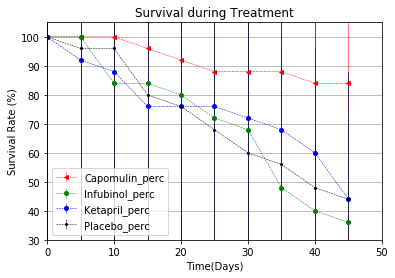

In [421]:
# Create percentage columns
mice_df2['Capomulin_perc']= mice_df2['Capomulin']/mice_df2['Capomulin'].iloc[0]*100
mice_df2['Infubinol_perc']= mice_df2['Infubinol']/mice_df2['Infubinol'].iloc[0]*100

mice_df2['Ketapril_perc']= mice_df2['Ketapril']/mice_df2['Ketapril'].iloc[0]*100

mice_df2['Placebo_perc']= mice_df2['Placebo']/mice_df2['Placebo'].iloc[0]*100


# Generate the Plot (Accounting for percentages)
plt.errorbar(mice_df2.index, mice_df2['Capomulin_perc'], yerr = mice_df2['Capomulin_perc'],color='r', marker='<',markersize= 4,linestyle = '--', linewidth = 0.5)
plt.errorbar(mice_df2.index, mice_df2['Infubinol_perc'], yerr = mice_df2['Infubinol_perc'],color='g', marker='o',markersize= 4,linestyle = '--', linewidth = 0.5)
plt.errorbar(mice_df2.index, mice_df2['Ketapril_perc'], yerr = mice_df2['Ketapril_perc'],color='b', marker='o',markersize= 4,linestyle = '--', linewidth = 0.5)
plt.errorbar(mice_df2.index, mice_df2['Placebo_perc'], yerr = mice_df2['Placebo_perc'],color='k', marker='.',markersize= 4,linestyle = '--', linewidth = 0.5)
plt.xlabel('Time(Days)')
plt.ylabel("Survival Rate (%)")
plt.title("Survival during Treatment")
#plt.yticks[0,5,10,15,20,25,30,35,40,45]
plt.xlim(0,50,10)
plt.ylim(30,105)
plt.legend(loc = ('best'))
plt.grid(True)



# Save the Figure

# Show the Figure


## Summary Bar Graph

In [422]:
# Calculate the percent changes for each drug
#perc_vol = ((tumor_mean_df1.iloc[-1]-tumor_mean_df1.iloc[0]/tumor_mean_df1.iloc[0])*100)
cap_change = ((tumor_mean_df1["Capomulin"][45] - tumor_mean_df1["Capomulin"][0])/45)*100
ceft_change = ((tumor_mean_df1["Ceftamin"][45] - tumor_mean_df1["Ceftamin"][0])/45)*100
infu_change = ((tumor_mean_df1["Infubinol"][45] - tumor_mean_df1["Infubinol"][0])/45)*100
keta_change = ((tumor_mean_df1["Ketapril"][45] - tumor_mean_df1["Ketapril"][0])/45)*100
nafti_change = ((tumor_mean_df1["Naftisol"][45] - tumor_mean_df1["Naftisol"][0])/45)*100
placebo_change = ((tumor_mean_df1["Placebo"][45] - tumor_mean_df1["Placebo"][0])/45)*100
prop_change = ((tumor_mean_df1["Propriva"][45] - tumor_mean_df1["Propriva"][0])/45)*100
rami_change = ((tumor_mean_df1["Ramicane"][45] - tumor_mean_df1["Ramicane"][0])/45)*100
stela_change = ((tumor_mean_df1["Stelasyn"][45] - tumor_mean_df1["Stelasyn"][0])/45)*100
zoni_change = ((tumor_mean_df1["Zoniferol"][45] - tumor_mean_df1["Zoniferol"][0])/45)*100

drug_perc_change = pd.DataFrame({"Drug": ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],
                                '% Change': [cap_change,ceft_change, infu_change, keta_change, nafti_change, placebo_change, prop_change,rami_change, stela_change, zoni_change]})



# Display the data to confirm

a=tumor_mean_df1["Capomulin"][45]
drug_perc_change


,Drug,% Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


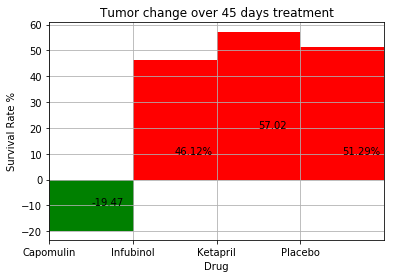

In [455]:
# Store all Relevant Percent Changes into a Tuple
drug_perc_plot = pd.DataFrame({"Drug": ["Capomulin","Infubinol","Ketapril","Placebo"],
                                '% Change': [cap_change, infu_change, keta_change,  placebo_change]})

drug_perc_plot.set_index('Drug')
x_axis =drug_perc_plot['Drug']
y_axis =drug_perc_plot['% Change']
summ_graph= plt.bar(x_axis,y_axis, color= 'r', align = 'edge',width =1.0)
summ_graph[0].set_color('g')
plt.grid(True)


plt.xlim(0, len(x_axis))
#plt.ylim(-20,max(drug_perc_plot.values))

x_labels =drug_perc_plot['Drug']
plt.xticks(np.arange(len(x_labels)),x_labels)

plt.xlabel("Drug")
plt.ylabel("Survival Rate %")
plt.title("Tumor change over 45 days treatment")
plt.text(0.5,-10, "-19.47")
plt.text(1.5,10,"46.12%")
plt.text(2.5,20,"57.02")
plt.text(3.5,10,"51.29%")


plt.show()


# Call functions to implement the function calls
#plt.xticks(np.arange(min(x_axis), ('Capomulin','Infubinol','Ketapril','Placebo')))

